# Phase Diagram of Copper using the Clausius Clapeyron Relation

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MatSciEd/Thermodynamics/blob/main/1%20Unary%20Phasediagrams/1.2%20Phase%20Diagram%20of%20Copper.ipynb)

In this notebook we will calculate the phase diagram of copper from the measured melting and boiling points and the volumes and heats of transformation at ambient pressure.

### How to run Jupyter Lab and Python 

The easiest way to launch a Jupyter notebook is to through Anaconda, which you can install on your computer:

* [Install Anaconda for Windows](https://docs.anaconda.com/anaconda/install/windows/)
* [Install Anaconda for MacOS](https://docs.anaconda.com/anaconda/install/mac-os/)

After the installation, start the Anaconda Navigator and launch Jupyter Lab.

### Preliminaries
Import the units, numerical, and plotting packages.

In [1]:
# Import NumPy numerical package
import numpy as np

# Install the pint package using pip in the current Jupyter kernel
# To use pint, restart the kernel
import sys
!{sys.executable} -m pip install pint

# Disable Pint's old fallback behavior (must come before importing Pint)
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"

# Import Pint for units in Python
from pint import UnitRegistry
u = UnitRegistry(auto_reduce_dimensions=True)
u.default_format = 'P'

# plotting package
import matplotlib.pyplot as plt
%pylab inline

import matplotlib
matplotlib.rcParams.update({'font.size': 24, 'text.usetex': False})

import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Thermodynamic data
Input the temperature and pressure at three important reference points in the water phase diagram.

In [2]:
# Melting and boiling points at 1 atm

T_melt_0 = 1358*u.K
T_boil_0 = 2830*u.K
P_0  = 1*u.atm

Make a nice printout of $(T,P)$ at the triple point, boiling point, and critical point:

In [3]:
print("Melting point  = ({}, {})".format(T_melt_0,P_0))
print("Boiling point  = ({}, {})".format(T_boil_0,P_0))

Melting point  = (1358 kelvin, 1 standard_atmosphere)
Boiling point  = (2830 kelvin, 1 standard_atmosphere)


At the melting point of copper, the enthalpy of melting and the volume change are

In [4]:
# melting: solid to liquid
H_melt = 13.4*u.kJ/u.mol
V_melt = 0.85*u.cc/u.mol
S_melt = H_melt/T_melt_0

At the boiling point of copper, the enthalpy of boiling is

In [5]:
# boiling: liquid to gas
H_boil = 305.6*u.kJ/u.mol
S_boil = H_boil/T_boil_0

### Solid-liquid line
We can use the Clausius-Clapeyron relation to obtain the approximate solid-liquid phase boundary by assuming that the heat of transformation and the volume of transformation are independent of pressure and temperature:
$$
p(T) = p_0 + \frac{\Delta H'_\mathrm{melt}}{\Delta V'_\mathrm{melt}} \ln \left ( \frac{T}{T_0} \right ) ,
$$
where, $T_0$ and $p_0$ are the temperature and pressure of the reference state.

Alternatively, we can assume that the entropy of melting is independent of pressure and temperature:
$$
p(T) = p_0 + \frac{\Delta S'_\mathrm{melt}}{\Delta V'_\mathrm{melt}} \left ( T-T_0 \right ) .
$$

If we use the experimental melting point at 1 atm as the reference state, we can calculate the transition pressure as a function of temperature.

Let us use temperatures ranging from 5 K below the triple point up to the triple point:

In [6]:
T_melt = np.linspace(T_melt_0.magnitude-0.01,T_melt_0.magnitude+2,500)*u.K # array of temp points
P_melt_H = P_0 + H_melt/V_melt*np.log(T_melt/T_melt_0)                  # array of pressure point
P_melt_S = P_0 + S_melt/V_melt*(T_melt-T_melt_0)                        # array of pressure point

We only want to look over a narrow temperature range because the slope of $p(T)$ is so large. The slope is determined by the constant $\Delta S'_\mathrm{melt}/\Delta V_\mathrm{melt}$, which is

In [7]:
print("Clausius Clapeyron slope = ", (S_melt/V_melt).to('MPa/K'))

Clausius Clapeyron slope =  11.608767218227497 megapascal/kelvin


Plot the pressure vs. temperature line describing the solid-liquid phase boundary. The **circle** is the triple point.

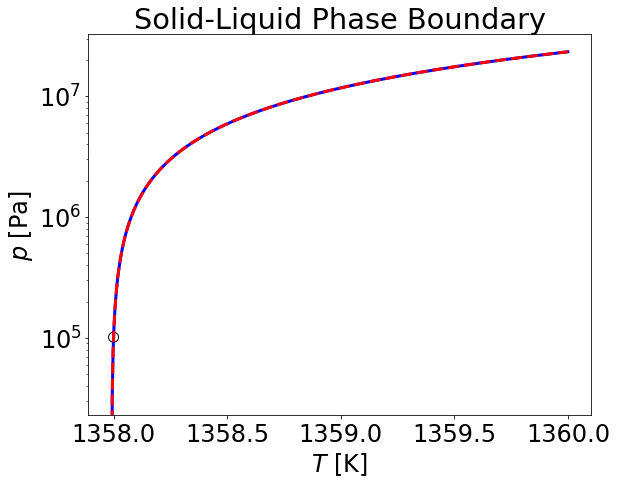

In [8]:
fig = plt.figure(figsize=(9,7))
plt.semilogy((T_melt/u.K).magnitude, (P_melt_H/u.Pa).magnitude, 'b-', linewidth=3.0)
plt.semilogy((T_melt/u.K).magnitude, (P_melt_S/u.Pa).magnitude, 'r--', linewidth=3.0)
plt.scatter([(T_melt_0/u.K).magnitude],[(P_0/u.Pa).magnitude],s=100, facecolors='none', edgecolors='k')
plt.xlabel('$T$ [K]')
plt.ylabel('$p$ [Pa]')
plt.title('Solid-Liquid Phase Boundary')
plt.show()

We observe that the difference in the two approximations for the Clausius Clapeyron slope,
$$
\frac{dp}{dT} = \frac{\Delta S}{\Delta V} = \frac{\Delta H}{T\Delta V} ,
$$
keeping either $\Delta S$ or $\Delta H$ fixed, result in essentially the same solid-liquid transformation line.

### Liquid-gas line
We derived in class from the Clausius Clapeyron equation that the vapor pressure for a liquid-gas equilibrium is approximated by
$$
p=p_0 \exp \left \{ \frac{\Delta H'_\mathrm{sub}}{R} \left ( \frac{1}{T_0}-\frac{1}{T} \right) \right \} ,
$$
where $T_0$ and $p_0$ are the temperature and pressure of the reference point. This derivation assumed that the gas phase is described by the ideal gas law and that the molar volume of the solid or liquid phase is negligibly small compared to the molar volume of the gas.

For the liquid-gas transformation, the $p(T)$ curve is not as steep as for the solid-liquid transformation. We will now look at temperature extending as far as 60 K below the boiling point.

In [9]:
R = 8.314*u.J/(u.mol*u.K)                            # gas constant

T_boil = np.linspace(T_boil_0.magnitude-1200,T_boil_0.magnitude+1000,100)*u.K  # array of temp points

constant_sub = H_boil/R                              # constant
constant_sub.ito_base_units()                        # constant converted to base units
T_boil_reduced = constant_sub*(1/T_boil_0-1/T_boil)  # reduced temperature -> the exponent eqn above
T_boil_reduced.ito_base_units()                      # the reduced temperature converted to base units
P_boil = P_0*np.exp(T_boil_reduced)                  # the pressure

The `constant_sub` in the above code is equal to $\Delta H'_\mathrm{sub}/ R$. This ratio has units of temperature and evaluates to

In [10]:
constant_sub

36757.27688236709 <Unit('kelvin')>

The temperature and pressure at the starting and ending points of the plot:

In [11]:
print("starting point = ({}, {})".format(T_boil[0],P_boil[0].to(u.Pa)))
print("  ending point = ({}, {})".format(T_boil[-1],P_boil[-1].to(u.Pa)))

starting point = (1630.0 kelvin, 7.128129782715828 pascal)
  ending point = (3830.0 kelvin, 3009622.705987731 pascal)


Plot the pressure-versus-temperature line describing the solid-gas boundary. The **circle** is the triple point.

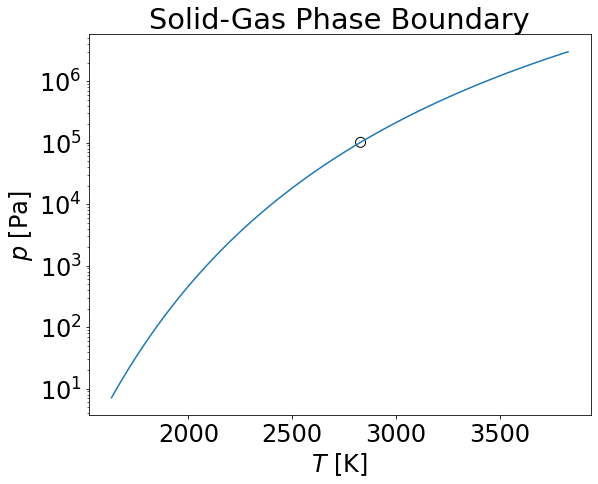

In [12]:
fig = plt.figure(figsize=(9,7))
plt.semilogy((T_boil/u.K).magnitude,(P_boil/u.Pa).magnitude)
plt.scatter([(T_boil_0/u.K).magnitude],[(P_0/u.Pa).magnitude],s=100, facecolors='none', edgecolors='k')
plt.xlabel('$T$ [K]')
plt.ylabel('$p$ [Pa]')
plt.title('Solid-Gas Phase Boundary')
plt.show()

### Entire phase diagram
Put together the pieces of the phase diagram that we have just developed. In the plot below, the filled circle indicates the critical point. The solid line overestimates the pressure at the critical point. We can see that estimating the phase line from the 1-atm boiling point significantly improves the accuracy of the phase-boundary line -- the dotted line more closely intersects the critial point.

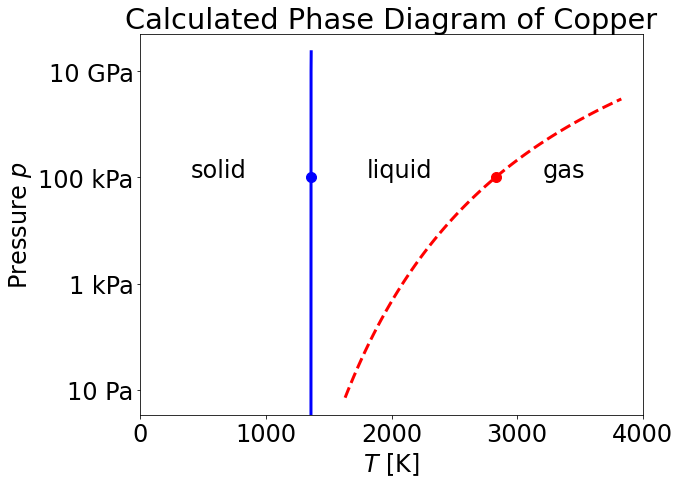

In [13]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

plt.semilogy((T_melt/u.K).magnitude, (P_melt_H/u.kPa).magnitude, 'b-', linewidth=3.0)
plt.semilogy((T_boil/u.K).magnitude, (P_boil/u.kPa).magnitude, 'r--', linewidth=3.0)

plt.scatter([(T_melt_0/u.K).magnitude],[(P_0/u.kPa).magnitude],s=100, facecolors='b', edgecolors='b')
plt.scatter([(T_boil_0/u.K).magnitude],[(P_0/u.kPa).magnitude],s=100, facecolors='r', edgecolors='r')

plt.xlabel('$T$ [K]')
plt.xticks([0,1000, 2000, 3000, 4000])
#plt.xlim([100,850])
plt.ylabel('Pressure $p$')
plt.yticks([1E-2,1E0,1E2,1E4],['10 Pa','1 kPa','100 kPa','10 GPa'])
#plt.ylim([0.1,1E10])
plt.title('Calculated Phase Diagram of Copper')

ax.annotate('solid', xy=(400,1E2), xycoords='data')
ax.annotate('liquid', xy=(1800,1E2), xycoords='data')
ax.annotate('gas', xy=(3200,1E2), xycoords='data')

plt.show()